# Commonsense Transformers for Automatic Knowledge graph construction


https://arxiv.org/pdf/1906.05317.pdf

ATOMIC, ConceptNet을 이용한 연구로부터 시작, 다른 많은 conventional KB(아마 knowledge bases)와 다르게 commonsense KB는 단지 open-text descriptions 으로 이루어져 있음  

automatic commonsense 를 완성하기 위해선 commonsense knowledge 에 대한 생성모델을 발전시킬 필요가 있음  

연구진은 풍성하고 다양한 commonsense descriptions 을 생성하는 COMET (commonsense transformer) 를 제안, 어려운 과제임에도 좋은 결과를 보임 (PLMs 에서 얻은 implicit knowledge 가 commonsense knowledge graph 의 explicit knowledge 를 생성하도록 transfer 됨)  


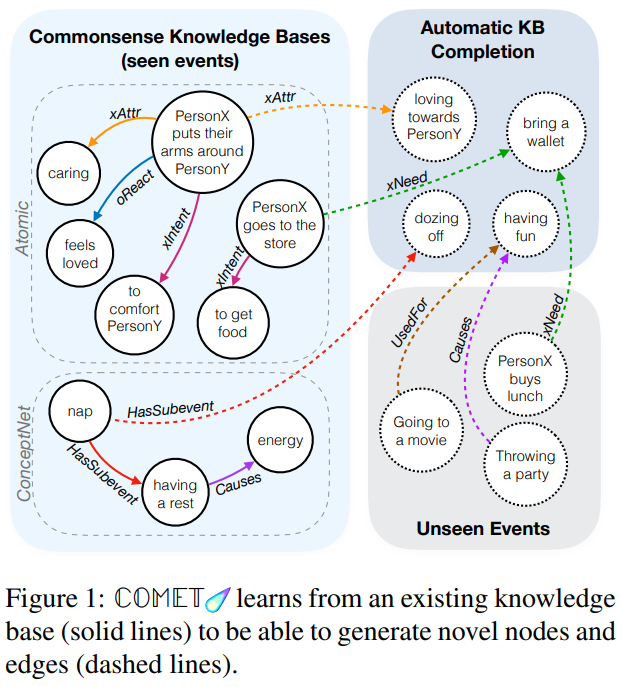

## Introduction

COMET : commonsense KBs 를 생성하는 모델, existing tuple 을 seed set of knowledge 로 사용하여 train, seed set은 pre-trained language model 이 seed set의 representation 을 학습하게 하여 knowledge를 생성하게 하고, high quality 의 novel tuple 생성함

Contirbutions :  
1. generative approach로 knowledge base construction 발전
2. large-scale transformer LM 을 이용하여 commonsense knowledge tuple을 생산하는 framework 발전
3. quality, novelity, diversity 관점에서 commonsense knowledge 생성하는 실험

## Learning to generate commonsense

seed set of knowledge tuples 에서 LM을 training 하면서 commonsense bases를 construct, 이러한 tuple은 COMET에 KB structure와 relation을 제공, representation을 학습한 LM은 새로운 node와 edge를 생성하는 느낌  


### Task
COMET이 \{s,r,o\} 꼴의 tuple로 학습한다고 가정  
s : the phrase subject of the tuple  
r : the relation of the tuple  
o : the phrase object of the tuple  

예를들어, taking a nap >  
\{ s:take a nap, r:Causes, o:have energy\}  
task 는 주어진 s,r 로 o를 생성하는 것  


### Transformer LM

구조는 multi-headed scaled dot product attention and fully connected layer 로 이루어진 여러개의 transformer blocks로 이루어짐

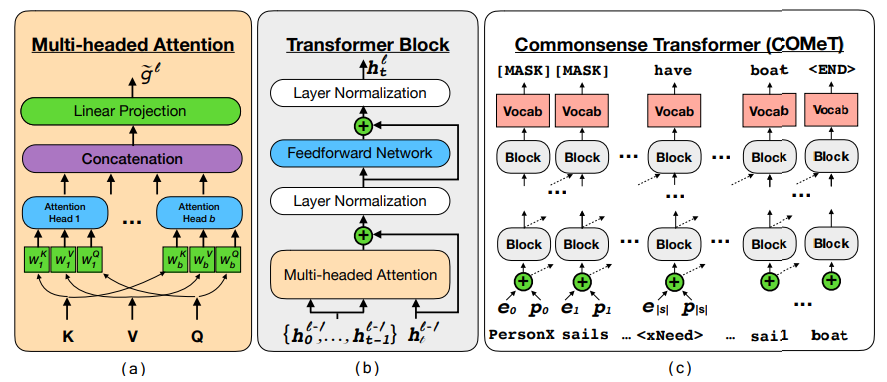

약간의 다른점은 multi-head attention에서 query는 직전 block의 output을 사용하지만 key와 value는 이전의 모든 block의 output을 사용    

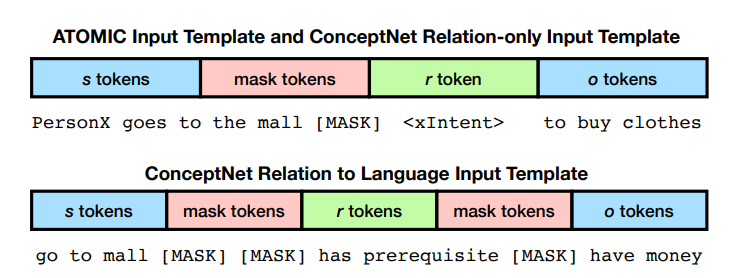

ATOMIC, ConceptNet은 위와 같은 형식으로 구성되어 있으며 word embedding + position embedding 을 input 으로 함  


### Training 

object tokens $X^o$ 예측에 대한 conditional loglikelihood를 최대화  
$$ L = -Σ^{|s|+|r|+|o|}_{t=|s|+|r|} logP(x_t|x_{t < t}) $$

pre-train된 GPT에 fine tuning을 위해 relation-embedding token 추가

## Experiments

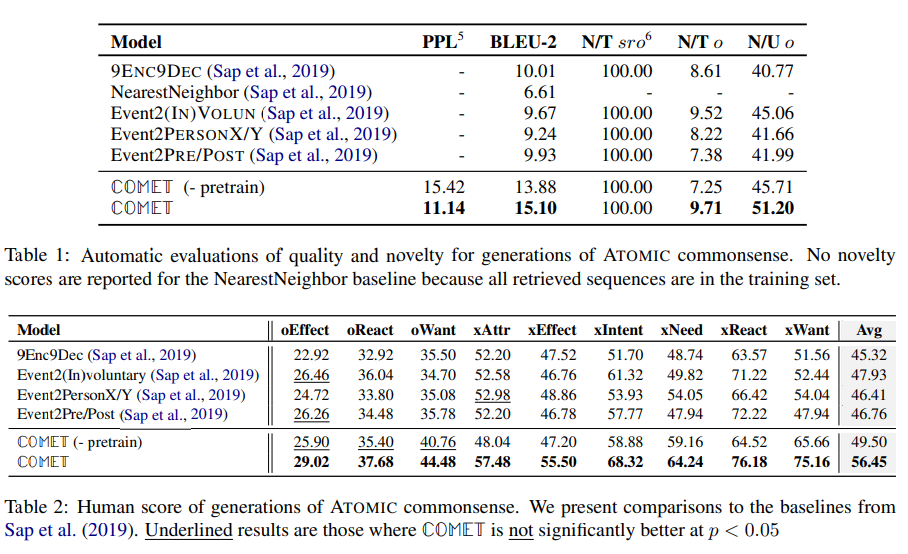

생성된 tuple 의 비율  
N/T sro : novel tuple  
N/T o   : novel objects
N/U o   : unique objects  

test set에서 sampling 된 100개의 events 에서의 human evaluation 에서도 COMET이 높은 성능

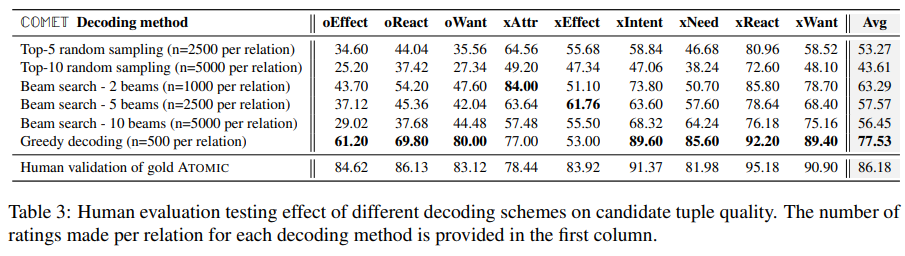

quality 에 대하여 어떤 decoding schemes 이 효과적인지 실험

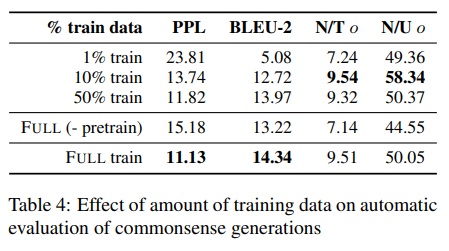

효율적인 train data 비율에 관한 실험

# 코드 실습

In [ ]:
# https://github.com/atcbosselut/comet-commonsense

!git clone https://github.com/atcbosselut/comet-commonsense.git

Cloning into 'comet-commonsense'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 187 (delta 6), reused 1 (delta 0), pack-reused 165
Receiving objects: 100% (187/187), 91.19 KiB | 3.04 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [ ]:
# change directory

%cd /content/comet-commonsense

!bash scripts/setup/get_atomic_data.sh
!bash scripts/setup/get_conceptnet_data.sh
!bash scripts/setup/get_model_files.sh

/content/comet-commonsense
--2023-02-21 10:51:08--  https://storage.googleapis.com/ai2-mosaic/public/atomic/v1.0/atomic_data.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19083782 (18M) [application/gzip]
Saving to: ‘atomic_data.tgz’

atomic_data.tgz     100%[===================>]  18.20M  67.8MB/s    in 0.3s    

2023-02-21 10:51:09 (67.8 MB/s) - ‘atomic_data.tgz’ saved [19083782/19083782]

LICENSE
README.md
sap2019atomic.pdf
v4_atomic_all_agg.csv
v4_atomic_all.csv
v4_atomic_dev.csv
v4_atomic_trn.csv
v4_atomic_tst.csv
--2023-02-21 10:51:10--  https://ttic.uchicago.edu/~kgimpel/comsense_resources/train100k.txt.gz
Resolving ttic.uchicago.edu (ttic.uchicago.edu)... 128.135.221.21
Connecting to ttic.uchicago.edu (ttic.uchicago.edu)|128.135.221.21|:443... connected.
HT

In [ ]:
!pip install tensorflow
!pip install ftfy==5.1
!pip install -c conda-forge spacy
!python -m spacy download en
!pip install tensorboardX
!pip install tqdm
!pip install pandas
!pip install ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ftfy: filename=ftfy-5.1-py3-none-any.whl size=39218 sha256=abda6c4ec78df803a774aa1f309f7b9dcad5f3fc6316788d237b74d3b2620048
  Stored in directory: /root/.cache/pip/wheels/d5/ff/54/874007bc8956cdcf3024154ea4cdc8e820f50ac79b7949c33c
Successfully built ftfy
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-21 10:52:14.343011: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to us

In [ ]:
# make dataloader

# !python scripts/data/make_atomic_data_loader.py

## load pre-train model

In [ ]:
# 일단 링크 들어가서 다운로드하자
# gdown은 구글 드라이브 다운 관련, 코랩에는 이미 설치
# uc <-> open
# !gdown https://drive.google.com/uc?id=1FccEsYPUHnjzmX-Y5vjCBeyRt1pLo8FB
# 뒤에 -O ./pretrained_models.tar.gz 붙이고 해도 안됨
# html로 저장이 되는듯 함
# 확인 코드 !file pretrained_models.tar.gz

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1FccEsYPUHnjzmX-Y5vjCBeyRt1pLo8FB 



In [ ]:
# 구글 드라이브로 불러오자

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# file1 파일을 dir 디렉터리로 이동

!mv "/content/drive/MyDrive/Colab Notebooks/코드 이론/pretrained_models.tar.gz" "/content/comet-commonsense"

In [ ]:
# change directory

%cd /content/comet-commonsense

/content/comet-commonsense


In [ ]:
!tar -xvzf pretrained_models.tar.gz

pretrained_models/
pretrained_models/conceptnet_pretrained_model.pickle
pretrained_models/atomic_pretrained_model.pickle


 -c   파일을 tar로 묶음   -p   파일 권한을 저장   -v   묶거나 파일을 풀 때 과정을 화면으로 출력   -f   파일 이름을 지정   -C   경로를 지정   -x   tar 압축을 풂   -z   gzip으로 압축하거나 해제함

In [ ]:
#comet-commonsense/scripts/setup/get_atomic_data.sh
# 여기에 있는 atomic 데이터를 받아야할듯 아마도
# 다시할때 그리고 model file도 받아보자 똑같긴한데 혹시모르니 

In [ ]:
!python scripts/interactive/atomic_single_example.py --model_file pretrained_models/atomic_pretrained_model.pickle

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-21 13:05:50.788203: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 13:05:52.086481: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-21 13:05:52.086633: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share